In [64]:
# cd jovyan/

/home/jovyan


In [65]:
%run __init__.py
%run src/load_data.py
sns.set()

In [5]:
[data[d]['train'].keys() for d in data.keys()]

[dict_keys(['raw_data', 'labels', 'engineered', 'scaled', 'gelman_scaled']),
 dict_keys(['raw_data', 'labels', 'scaled'])]

In [66]:
adult_train_engineered_df = data['adult']['train']['engineered']
adult_train_scaled_df = data['adult']['train']['scaled']
adult_train_gelman_scaled_df = data['adult']['train']['gelman_scaled']
madelon_train_raw_data_df = data['madelon']['train']['raw_data']
madelon_train_scaled_df = data['madelon']['train']['scaled']

In [67]:
del MinMaxScaler                   
del StandardScaler                 
del adult_feature_engineering      
del adult_test_data                
del adult_test_labels              
del adult_train_data               
del data                           
del get_ipython                    
del madelon_test_data              
del madelon_test_labels            
del madelon_train_data             
del scale                          
del scaler                         

In [68]:
whos

Variable                         Type              Data/Info
------------------------------------------------------------
FastICA                          type              <class 'sklearn.decomposition.fastica_.FastICA'>
PCA                              ABCMeta           <class 'sklearn.decomposition.pca.PCA'>
adult_train_engineered_df        DataFrame                age  capital-gain <...>25071 rows x 103 columns]
adult_train_gelman_scaled_df     DataFrame                     age  capital-<...>25071 rows x 103 columns]
adult_train_labels               Series            26490    1\n6476     0\n2<...>n5800     0\ndtype: int64
adult_train_scaled_df            DataFrame                     age  capital-<...>25071 rows x 103 columns]
ax                               ndarray           5: 5 elems, type `object`, 40 bytes
display                          function          <function display at 0x7f6668f87ae8>
fig                              Figure            Figure(2160x576)
ica_adult_engine

In [12]:
madelon_train_labels.replace(-1,0, inplace = True)

In [5]:
from sklearn.decomposition import PCA, FastICA

## PCA

* transform
* look at elbow scores (cumsum)
* look at loadings for top X features

### Adult

In [6]:
display("adult_train_engineered_df shape:     %s" % str(adult_train_engineered_df.shape))
display("adult_train_scaled_df shape:         %s" % str(adult_train_scaled_df.shape))
display("adult_train_gelman_scaled_df shape:  %s" % str(adult_train_gelman_scaled_df.shape))
display("madelon_train_raw_data_df shape:     %s" % str(madelon_train_raw_data_df.shape))
display("madelon_train_scaled_df shape:       %s" % str(madelon_train_scaled_df.shape))

'adult_train_engineered_df shape:     (25071, 103)'

'adult_train_scaled_df shape:         (25071, 103)'

'adult_train_gelman_scaled_df shape:  (25071, 103)'

'madelon_train_raw_data_df shape:     (2000, 500)'

'madelon_train_scaled_df shape:       (2000, 500)'

In [74]:
pca_adult_engineered = PCA(whiten=True)
pca_adult_scaled = PCA(whiten=True)
pca_adult_gelman_scaled = PCA(whiten=True)
pca_madelon_raw_data = PCA(whiten=True)
pca_madelon_scaled = PCA(whiten=True)

pca_adult_engineered.fit(adult_train_engineered_df)
pca_adult_scaled.fit(adult_train_scaled_df)
pca_adult_gelman_scaled.fit(adult_train_gelman_scaled_df)
pca_madelon_raw_data.fit(madelon_train_raw_data_df)
pca_madelon_scaled.fit(madelon_train_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Text(0.5,1,'Explained Variance Ratio \nfor PCA Components Adult Dataset')

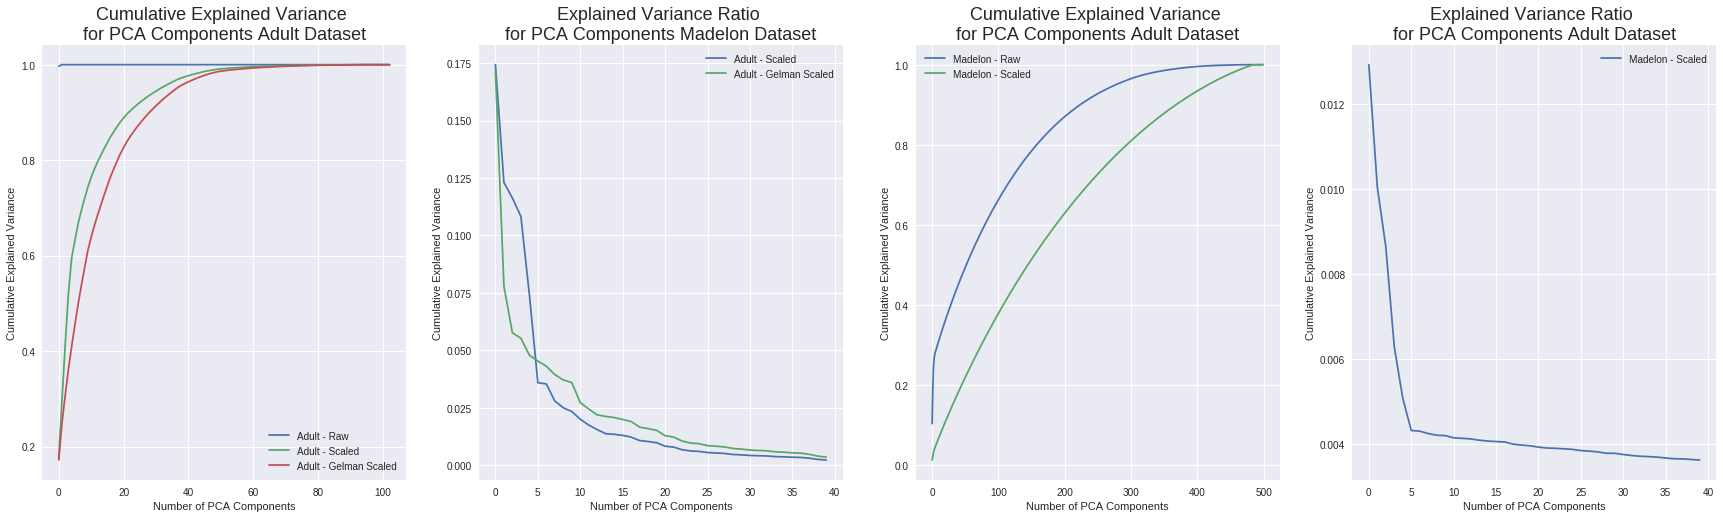

In [60]:
fig, ax = plt.subplots(1, 4, figsize = (30,8))
# fig.suptitle("Cumulative Explained Variance for PCA Components", fontsize=24)
ax[0].plot(np.cumsum(pca_adult_engineered.explained_variance_ratio_), label='Adult - Raw')
ax[0].plot(np.cumsum(pca_adult_scaled.explained_variance_ratio_), label='Adult - Scaled')
ax[0].plot(np.cumsum(pca_adult_gelman_scaled.explained_variance_ratio_), label='Adult - Gelman Scaled')
ax[0].set_xlabel("Number of PCA Components")
ax[0].set_ylabel("Cumulative Explained Variance")
ax[0].legend()
ax[0].set_title("Cumulative Explained Variance \nfor PCA Components Adult Dataset", fontsize=18)
ax[1].plot(pca_adult_scaled.explained_variance_ratio_[:40], label='Adult - Scaled')
ax[1].plot(pca_adult_gelman_scaled.explained_variance_ratio_[:40], label='Adult - Gelman Scaled')
ax[1].set_xlabel("Number of PCA Components")
ax[1].set_ylabel("Cumulative Explained Variance")
ax[1].legend()
ax[1].set_title("Explained Variance Ratio \nfor PCA Components Madelon Dataset", fontsize=18)
ax[2].plot(np.cumsum(pca_madelon_raw_data.explained_variance_ratio_), label='Madelon - Raw')
ax[2].plot(np.cumsum(pca_madelon_scaled.explained_variance_ratio_), label='Madelon - Scaled')
ax[2].set_xlabel("Number of PCA Components")
ax[2].set_ylabel("Cumulative Explained Variance")
ax[2].legend()
ax[2].set_title("Cumulative Explained Variance \nfor PCA Components Adult Dataset", fontsize=18)
ax[3].plot(pca_madelon_scaled.explained_variance_ratio_[:40], label='Madelon - Scaled')
ax[3].set_xlabel("Number of PCA Components")
ax[3].set_ylabel("Cumulative Explained Variance")
ax[3].legend()
ax[3].set_title("Explained Variance Ratio \nfor PCA Components Adult Dataset", fontsize=18)



In [104]:
pca_adult_gelman_scaled = PCA(n_components=9, whiten=True)
pca_madelon_scaled = PCA(n_components=5, whiten=True)

adult_train_gelman_scaled_pca_df = pd.DataFrame(pca_adult_gelman_scaled.fit_transform(adult_train_gelman_scaled_df),
                                                columns=['PC '+str(i) for i in range(1,10)])
madelon_train_scaled_pca_df = pd.DataFrame(pca_madelon_scaled.fit_transform(madelon_train_scaled_df),
                                           columns=['PC '+str(i) for i in range(1,6)])

from sklearn.externals import joblib
joblib.dump(pca_adult_gelman_scaled, 'data/adult-final-pca.pkl') 
joblib.dump(pca_madelon_scaled, 'data/madelon-final-pca.pkl') 
adult_train_gelman_scaled_pca_df.to_pickle('data/adult_train_gelman_scaled_pca_df.p')
madelon_train_scaled_pca_df.to_pickle('data/madelon_train_scaled_pca_df.p') 

In [79]:
pca_adult_gelman_pc =  pca_adult_gelman_scaled.fit_transform(adult_train_gelman_scaled_df)
pca_adult_gelman_inv = pca_adult_gelman_scaled.inverse_transform(pca_adult_gelman_pc)

loss = ((adult_train_gelman_scaled_df - pca_adult_gelman_inv) ** 2).mean()
loss.sum()

6.0573255703569367e-29

In [84]:
def pca_recon_error(pca, data):
    errs = []
    for i in range(data.shape[1]):
        pca = PCA(n_components=i, whiten=True)
        data_pc =  pca.fit_transform(data)
        data_inv = pca.inverse_transform(data_pc)

        loss = ((data - data_inv) ** 2).mean()
        errs.append(loss.sum())
    return errs

In [86]:
pca_adult_engineered_errs = pca_recon_error(pca_adult_engineered, adult_train_engineered_df)

In [98]:
pca_adult_recon_err = pd.DataFrame(pca_adult_engineered_errs, columns=['raw'])
pca_adult_recon_err['scaled'] = pca_adult_scaled_errs
pca_adult_recon_err['gelman'] = pca_adult_gelman_scaled_errs
pca_adult_recon_err.to_pickle('data/adult-pca-recon-err.p')

In [100]:
pca_madelon_recon_err = pd.DataFrame(pca_madelon_raw_data_errs, columns=['raw'])
pca_madelon_recon_err['scaled'] = pca_madelon_scaled_errs
pca_madelon_recon_err.to_pickle('data/madelon-pca-recon-err.p')

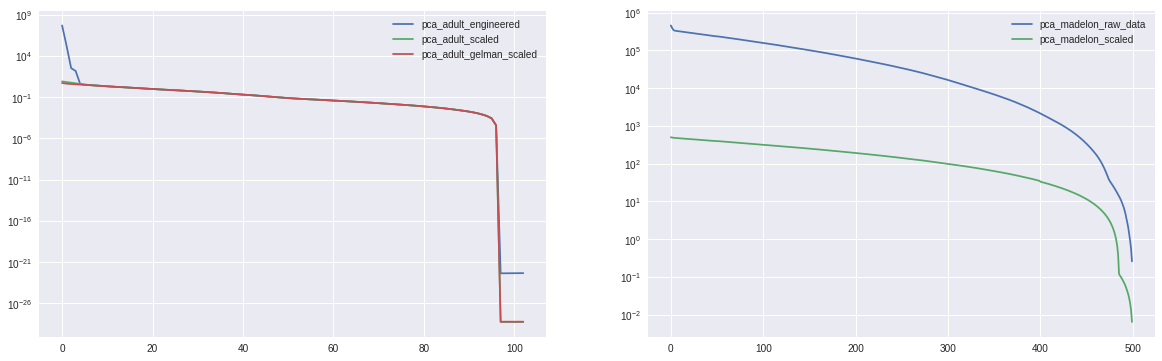

In [94]:
_, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].plot(pca_adult_engineered_errs, label='pca_adult_engineered')
ax[0].plot(pca_adult_scaled_errs, label='pca_adult_scaled')
ax[0].plot(pca_adult_gelman_scaled_errs, label='pca_adult_gelman_scaled')
ax[1].plot(pca_madelon_raw_data_errs, label='pca_madelon_raw_data')
ax[1].plot(pca_madelon_scaled_errs, label='pca_madelon_scaled')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].set_yscale('log')
ax[1].legend()

In [90]:
pca_adult_scaled_errs = pca_recon_error(pca_adult_scaled, adult_train_scaled_df)
pca_adult_gelman_scaled_errs = pca_recon_error(pca_adult_gelman_scaled, adult_train_gelman_scaled_df)
pca_madelon_raw_data_errs = pca_recon_error(pca_madelon_raw_data, madelon_train_raw_data_df)
pca_madelon_scaled_errs = pca_recon_error(pca_madelon_scaled, madelon_train_scaled_df)

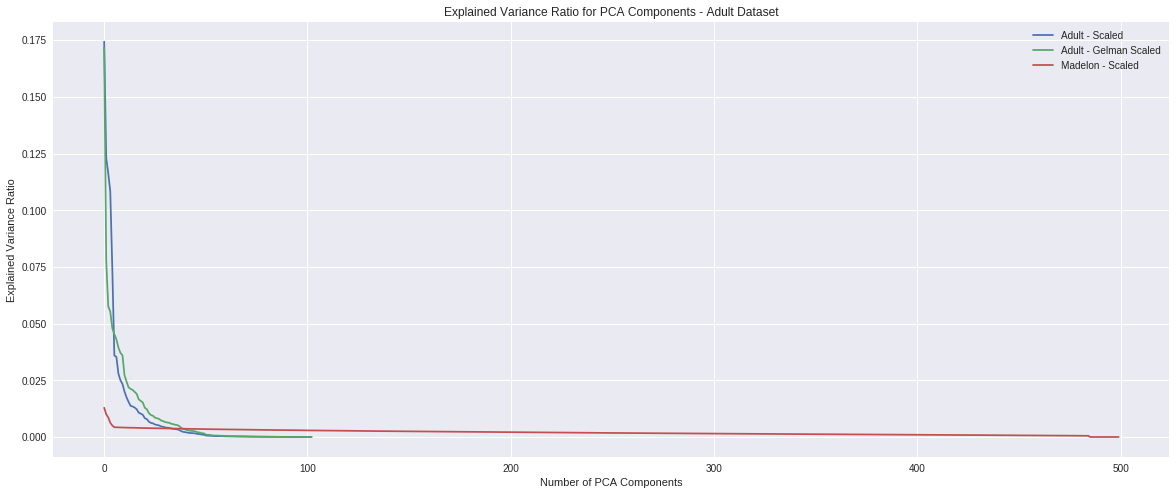

In [43]:
plt.figure(figsize = (20,8))


### Adult PCA on continous numerical only

In [19]:
adult_train_no_dummy.shape

(25071, 12)

In [22]:
adult_train_no_dummy.dtypes

age                float64
workclass         category
education          float64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country    category
dtype: object

In [20]:
pca_adult_cont_only = PCA(whiten=True)
pca_adult_cont_only.fit(adult_train_no_dummy[cont_columns]) #fit only on continuous values!

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [23]:
pca_adult_cont_only.explained_variance_ratio_

array([ 0.2535054 ,  0.20602128,  0.19803498,  0.17725209,  0.16518625])

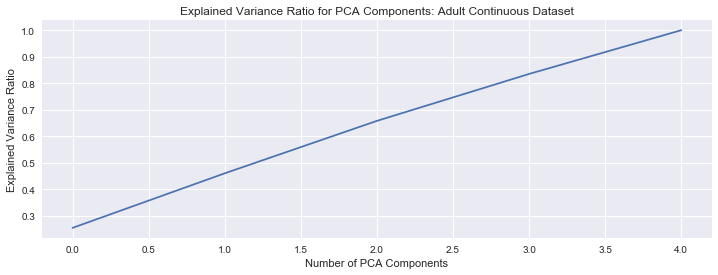

In [32]:
plot_xplained_var("Adult Continuous", pca_adult_cont_only)

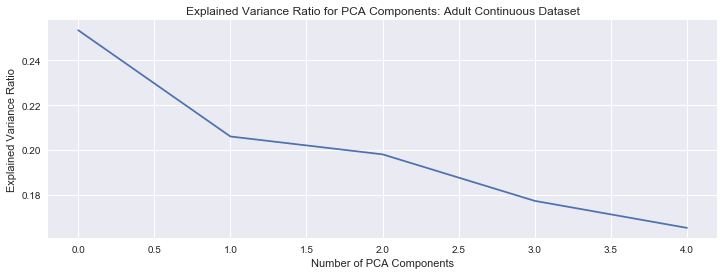

In [212]:
plot_scree("Adult Continuous", pca_adult_cont_only)

In [30]:
pca_madelon = PCA(whiten=True)
pca_madelon.fit(madelon_train_f)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

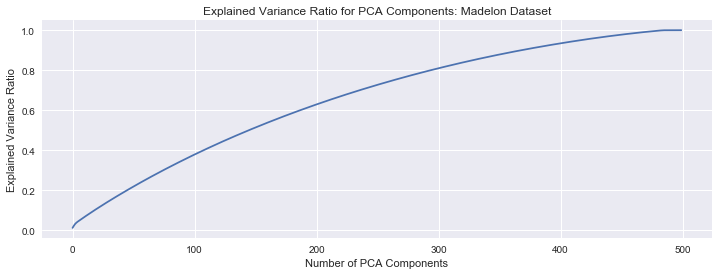

In [31]:
plot_xplained_var("Madelon", pca_madelon)

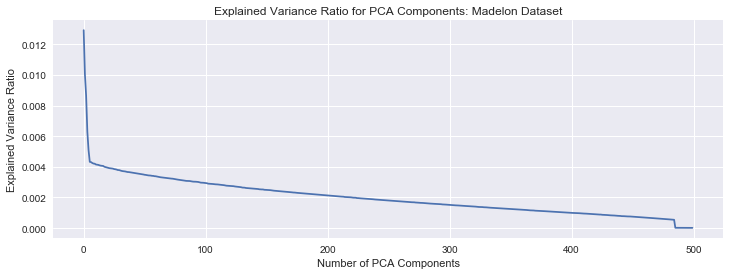

In [213]:
plot_scree ("Madelon", pca_madelon)

## ICA 

## Madelon

In [17]:
ica_adult_engineered = FastICA(30, max_iter=600).fit_transform(adult_train_engineered_df)
ica_adult_scaled = FastICA(30, max_iter=600).fit_transform(adult_train_scaled_df)
ica_adult_gelman_scaled = FastICA(30, max_iter=600).fit_transform(adult_train_gelman_scaled_df)
ica_madelon_raw_data = FastICA(10, max_iter=600).fit_transform(madelon_train_raw_data_df)
ica_madelon_scaled = FastICA(10, max_iter=600).fit_transform(madelon_train_scaled_df)

In [16]:
ica_opt_adult_engineered = FastICA(15, max_iter=600).fit_transform(adult_train_engineered_df)
ica_opt_adult_scaled = FastICA(15, max_iter=600).fit_transform(adult_train_scaled_df)
ica_opt_adult_gelman_scaled = FastICA(15, max_iter=600).fit_transform(adult_train_gelman_scaled_df)
ica_opt_madelon_raw_data = FastICA(5, max_iter=600).fit_transform(madelon_train_raw_data_df)
ica_opt_madelon_scaled = FastICA(5, max_iter=600).fit_transform(madelon_train_scaled_df)

In [25]:
def plot_kurtosis_ica(ica_feat, dataset_name, subset, data, ax, n = None, shift=0, sort=False):
    
    ic_comp_df = pd.DataFrame(ica_feat)
    ic_comp = ic_comp_df.kurt(axis=0).abs()
    if sort: ic_comp.sort_values(inplace=True, ascending=False)

    ax.bar(np.array(range(len(ic_comp)))+shift, ic_comp, width=0.4, label=dataset_name+" "+subset)
    ax.set_title("Kurtosis by ICA components: {} Dataset".format(dataset_name))
    ax.set_xlabel("ICA Components")
    ax.set_ylabel("Kurtosis, 0 == Gaussian")
    ax.legend()
    return ic_comp_df

Text(0,0.5,'IC 2')

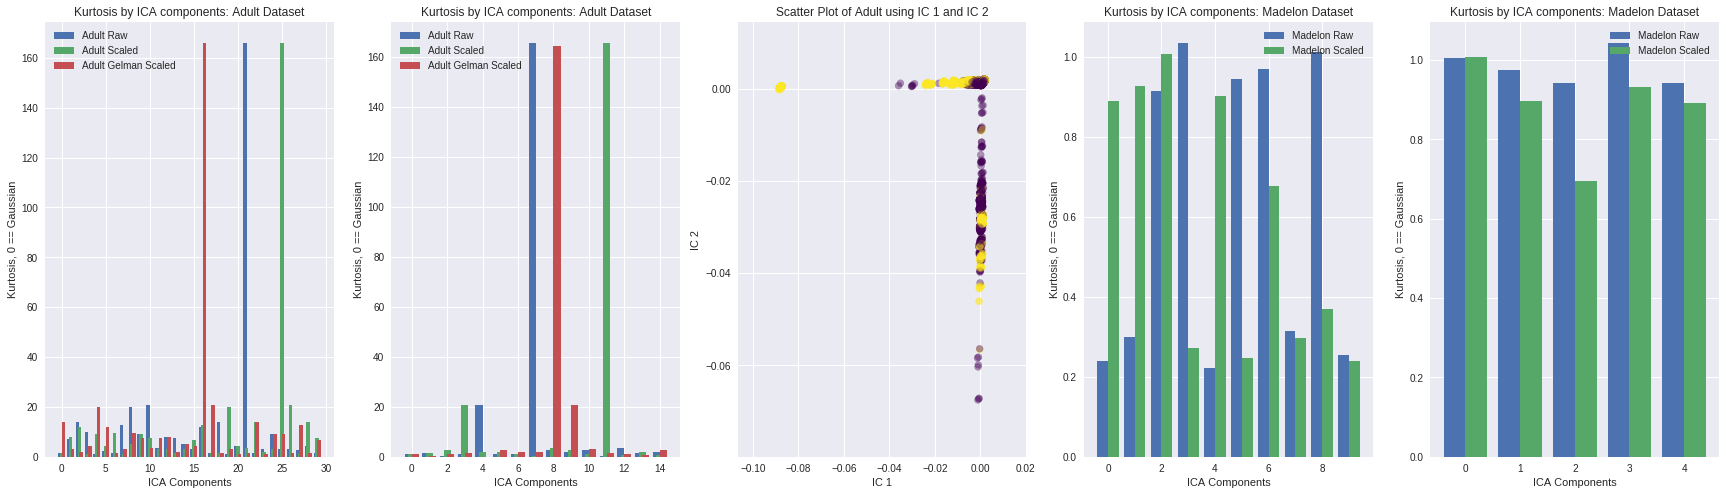

In [58]:
fig, ax = plt.subplots(1,5, figsize = (30,8))
ica_madelon_raw_data_ic = plot_kurtosis_ica(ica_madelon_raw_data, "Madelon", "Raw", madelon_train_raw_data_df, ax=ax[3], shift=-.2)
ica_madelon_scaled_ic = plot_kurtosis_ica(ica_madelon_scaled, "Madelon", "Scaled", madelon_train_scaled_df, ax=ax[3],shift=.2)
ica_adult_engineered_ic = plot_kurtosis_ica(ica_adult_engineered, "Adult", "Raw", adult_train_engineered_df, ax=ax[0], shift=-.2)
ica_adult_scaled_ic = plot_kurtosis_ica(ica_adult_scaled, "Adult", "Scaled", adult_train_scaled_df, ax=ax[0])
ica_adult_gelman_scaled_ic = plot_kurtosis_ica(ica_adult_gelman_scaled, "Adult", "Gelman Scaled", adult_train_gelman_scaled_df, ax=ax[0],shift=.2)
ica_opt_madelon_raw_data_ic = plot_kurtosis_ica(ica_opt_madelon_raw_data, "Madelon", "Raw", madelon_train_raw_data_df, ax=ax[4], shift=-.2)
ica_opt_madelon_scaled_ic = plot_kurtosis_ica(ica_opt_madelon_scaled, "Madelon", "Scaled", madelon_train_scaled_df, ax=ax[4],shift=.2)
ica_opt_adult_engineered_ic = plot_kurtosis_ica(ica_opt_adult_engineered, "Adult", "Raw", adult_train_engineered_df, ax=ax[1], shift=-.2)
ica_opt_adult_scaled_ic = plot_kurtosis_ica(ica_opt_adult_scaled, "Adult", "Scaled", adult_train_scaled_df, ax=ax[1])
ica_opt_adult_gelman_scaled_ic = plot_kurtosis_ica(ica_opt_adult_gelman_scaled, "Adult", "Gelman Scaled", adult_train_gelman_scaled_df, ax=ax[1],shift=.2)
top_ic = ica_adult_gelman_scaled_ic.kurt().sort_values(ascending=False)[:2].index
top_ic = ica_adult_gelman_scaled_ic[top_ic]
top_ic.columns = ['IC_1', 'IC_2']
top_ic.to_pickle('data/adult-final-ic.pkl')
ax[2].scatter(top_ic.IC_1, top_ic.IC_2, c=adult_train_labels, alpha=0.4, cmap=viridis)
ax[2].set_title("Scatter Plot of Adult using IC 1 and IC 2")
ax[2].set_xlabel("IC 1")
ax[2].set_ylabel("IC 2")

In [40]:
top_ic.shape

(2, 30)

In [62]:
top_ic = ica_madelon_scaled_ic.kurt().sort_values(ascending=False)[:5].index
top_ic = ica_madelon_scaled_ic[top_ic]
top_ic.columns = ['IC_1', 'IC_2', 'IC_3', 'IC_4', 'IC_5']
top_ic.to_pickle('data/madelon-final-ic.pkl')
top_ic

,IC_1,IC_2,IC_3,IC_4,IC_5
0,0.017624,-0.003188,-0.009560,0.009122,0.016957
1,0.005383,0.025114,0.017446,0.007607,0.016132
2,0.003747,-0.009922,-0.000239,-0.007849,0.008071
3,0.006720,0.023928,0.001079,-0.024204,-0.044277
4,-0.004442,-0.008592,-0.014916,0.017422,0.008680
5,0.013054,0.020716,0.003721,-0.015552,0.000486
6,0.009435,-0.005803,-0.006309,0.006779,0.040762
7,0.001862,-0.008957,0.038141,-0.035043,-0.030883
8,-0.006608,0.035203,-0.018288,-0.030264,-0.016498
9,0.031359,0.003617,0.001170,0.005626,-0.017075


In [52]:
from matplotlib.cm import viridis

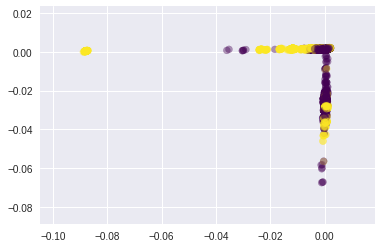

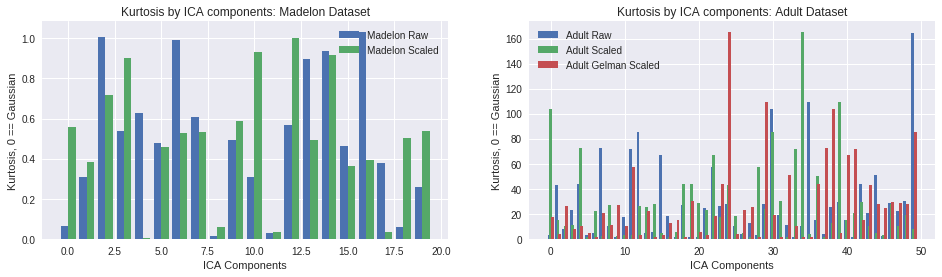

In [105]:
fig, ax = plt.subplots(1,2, figsize = (16,4))


/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


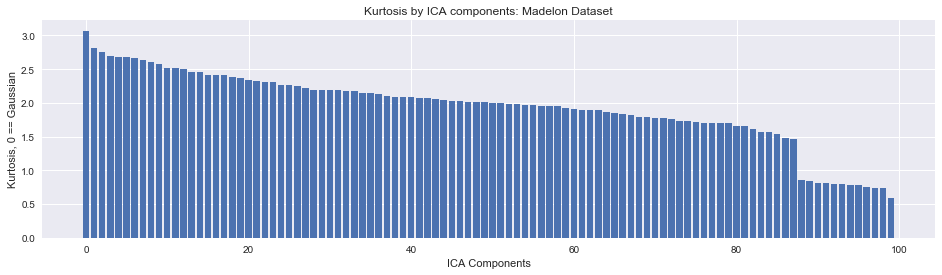

In [221]:
plot_kurtosis_ica("Madelon", madelon_train_f, 100)

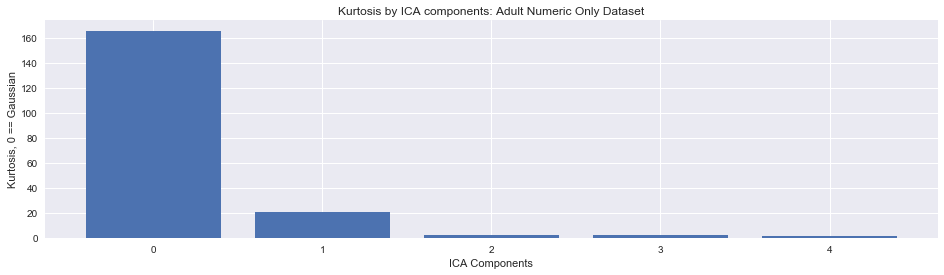

In [222]:
plot_kurtosis_ica("Adult Numeric Only", adult_train_no_dummy[cont_columns])

/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


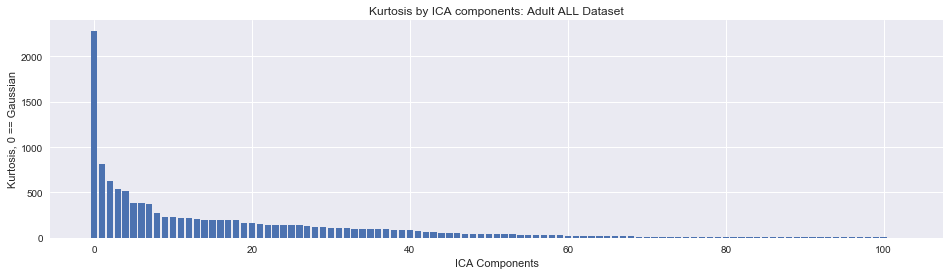

In [223]:
plot_kurtosis_ica("Adult ALL", adult_train_f)